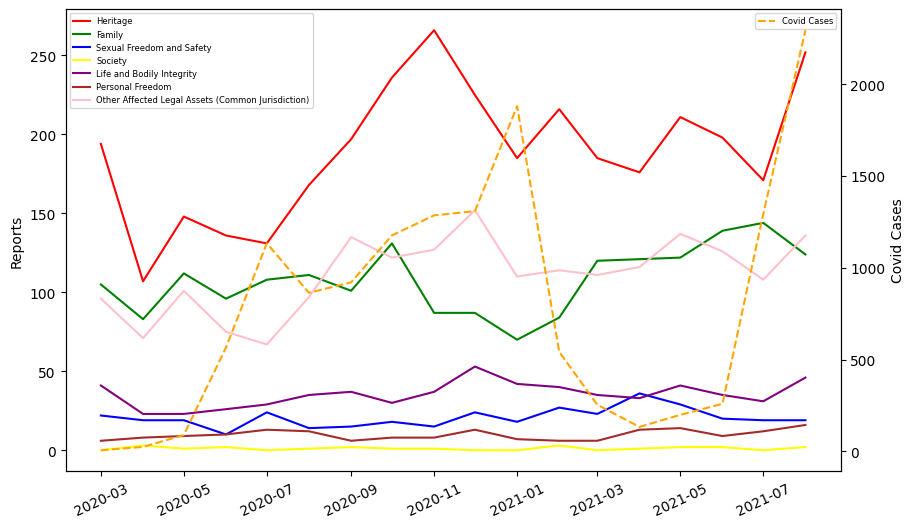

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

#csv for the covid cases
covid = pd.read_csv(os.getenv('covid_reports'))

#csv for complaints
comp = pd.read_csv(os.getenv('city_complaints'))

#cleaning data in both dataframes

#keeping only the relevant columns
covid = covid[covid['Municipality'] == os.getenv('Municipality')]
covid = covid[['Month','Daily Cases']]
comp = comp[['Month','Affected Legal Good', 'Value']]

#changing the labels from spanish to english
#regex = False because of ()
comp['Affected Legal Good'].replace(
    {'Patrimonio': 'Heritage', 'Familia':'Family', 'Libertad y Seguridad Sexual':'Sexual Freedom and Safety', 
     'Sociedad':'Society', 'Vida e Integridad Corporal':'Life and Bodily Integrity', 'Libertad Personal':'Personal Freedom', 
     'Otros Bienes Jurídicos Afectados (Del Fuero Común)':'Other Affected Legal Assets (Common Jurisdiction)'}, 
     inplace=True, regex=False)

#groupby of months
covid = covid.groupby(['Month'])['Daily Cases'].sum()
covid = covid.reset_index()

#changing daily to monthly cases
covid.rename(columns = {'Month' : 'Month', 'Daily Cases' : 'Monthly Cases'}, inplace = True)

comp['Month'] = pd.to_datetime(comp['Month'], format='%Y-%m')

#Filter by dates in range
comp = comp.loc[(comp['Month'] > os.getenv('start_date')) & (comp['Month'] <= os.getenv('end_date'))]

covid = covid.loc[(covid['Month'] > os.getenv('start_date')) & (covid['Month'] <= os.getenv('end_date'))]

#changing dtypes of months to object for easier management
#changing dtypes of months to datetime with UTC timezone
comp['Month'] = pd.to_datetime(comp['Month'], format='%Y-%m').dt.tz_localize('UTC')

import matplotlib.pyplot as plt

# List of unique values in the "affected legal good" column
unique_values = comp['Affected Legal Good'].unique()

# Define a color map for the lines
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'brown', 'pink']

# Create a dictionary to map unique values to colors
color_map = dict(zip(unique_values, colors))

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Iterate through unique values and plot the corresponding dataframes
for value in unique_values:
    sub_df = comp[comp['Affected Legal Good'] == value]
    ax1.plot_date(sub_df['Month'], sub_df['Value'], '-', color=color_map.get(value, 'black'), label=value)

plt.xticks(rotation=25)
ax1.legend(fontsize=6)
ax1.set_ylabel('Reports')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Covid cases data
ax2.plot_date(pd.to_datetime(covid['Month'], format='%Y-%m').dt.tz_localize('UTC'), covid['Monthly Cases'], '--', color='orange')
ax2.legend(['Covid Cases'], fontsize=6, loc=1)
ax2.set_ylabel('Covid Cases')

plt.show()